# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [2]:
#Your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('homepage_actions.csv')
df


,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [59]:
df['id'].astype(str)
df
df2 = df.sort_values(['id','timestamp'])

#df3 = df['id'].value_counts().to_frame()
#df3.reset_index(inplace=True)
#df3 = df3.loc[df3['id']==1]
#singles = df3['index']
#for single in singles
    if df['id'] == single & df['action'] == 'click'



#experiment = df.loc[(df['group'] == 'experiment')]['action']
#control = df.loc[(df['group'] == 'experiment')]['action']


## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

Power_divergenceResult(statistic=33.89952032315072, pvalue=5.8033006040559e-09)

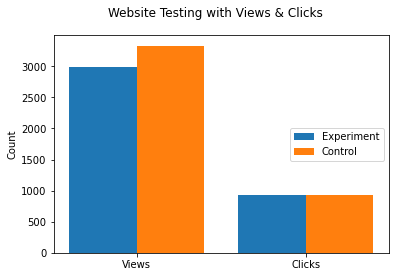

In [72]:
#Your code here'
#Because we are dealing with categorical counts on a non-continuous data
#a Chi test would be appropriate here.

"""
Null Hypothesis states that the mean percentage of clicks is the same 
for both groups, Control and Experiment
""" 

"""Alternate Hypothesis states that the mean percentage of clicks 
is different for each"""

#Let's graph the input
controlclicks = df.loc[(df['group'] =='control') & (df['action'] =='click')]
controlviews = df.loc[(df['group'] =='control') & (df['action'] =='view')]
experimentclicks = df.loc[(df['group'] =='experiment') & (df['action'] =='click')]
experimentviews = df.loc[(df['group'] =='experiment') & (df['action'] =='view')]

fig, ax = plt.subplots()

control = [len(controlviews), len(controlclicks)]
experiment = [len(experimentviews), len(experimentclicks)]

x = np.array([0, 5])
offset = 1
bar_width = 2

# Plot bars
ax.bar(x-offset, experiment, bar_width, label="Experiment")
ax.bar(x+offset, control, bar_width, label="Control")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Views", "Clicks"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Website Testing with Views & Clicks");


results = stats.chisquare(experiment, control)
results

#The p-value is very low

838.0168067226891

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [76]:
expected_clicks = len(experimentviews)*len(controlclicks)/len(controlviews)

#controlclicks = df.loc[(df['group'] =='control') & (df['action'] =='click')]
#controlviews = df.loc[(df['group'] =='control') & (df['action'] =='view')]
#experimentclicks = df.loc[(df['group'] =='experiment') & (df['action'] =='click')]
#experimentviews = df.loc[(df['group'] =='experiment') & (df['action'] =='view')]
expected_clicks

838.0168067226891

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [99]:
#Your code here
df_control = df.loc[df['group']=='control']
df_experiment = df.loc[df['group']=='experiment']
df_eclick = df_experiment['id'].value_counts().to_frame()
df_eclick = df_eclick['id'] - 1
observed_mu = df_eclick.mean()
expected_mu = expected_clicks/len(experimentviews)
expected_mu
df_cclick = df_control['id'].value_counts().to_frame()
df_cclick = df_cclick['id'] - 1
expected_sigma = df_eclick.std()


import scipy.stats as stats
from math import sqrt
x_bar = observed_mu # sample mean 
n = len(experimentclicks) + len(experimentviews)# number of people in the experiment
sigma = expected_sigma # sd of population
mu = expected_mu # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

4.068217409630853

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [100]:
#Your code here
stats.norm.cdf(z)

0.9999763129152375

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.